<h2><center> Welcome to the Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [3]:
SEED = 42
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [51]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [5]:
# Preview train dataset
train.head()

ID  I/O Data Operations   I/O Data Bytes  \
0  ID_4W8AP96UO6           114.798900      3790.450939   
1  ID_UD3TM0ZYND            14.154240      5182.451722   
2  ID_XAG1HC0HWM             0.044444       120.821253   
3  ID_CEXD05IR09            31.369916    127228.251100   
4  ID_X6E97FT8IF             5.046181      1091.620117   

   Number of subprocesses  Time on processor  Disk Reading/sec  \
0                    28.0           0.427078          6.162365   
1                    28.0           0.138876          5.399498   
2                    28.0           0.000000          1.577765   
3                    31.0           0.523750         15.981107   
4                    25.0           0.069468          1.356022   

   Disc Writing/sec  Bytes Sent/sent  Received Bytes (HTTP)  \
0         21.220403        58.492773              63.959387   
1          0.000000        22.886762              29.508369   
2          0.000000        11.733239              12.888786   
3          5.356671       602.125436            6976.986795   
4          0.000000        16.138887              13.271234   

   Network packets sent  Network packets received  Pages Read/sec  \
0              0.621206                  0.521813       24.624612   
1              0.422183                  0.444403        0.044440   
2              0.177776                  0.155554        0.044444   
3              3.311801                  5.756755        5.623394   
4              0.155609                  0.133379        0.000000   

   Pages Input/sec  Page Errors/sec  Confirmed byte radius  Label  
0              0.0      1001.533430              27.190843      1  
1              0.0      1089.121009              30.150941      0  
2              0.0       322.464081              28.163287      0  
3              0.0     12015.169690              34.204404      0  
4              0.0       550.989619              31.466889      1

In [6]:
# Preview test dataset
test.head()

ID  I/O Data Operations   I/O Data Bytes  \
0  ID_L7RNFK5JC9            32.709430    121124.141400   
1  ID_KUTY5K1G5F             2.065990      2029.713475   
2  ID_H6PJWKU831           114.524684      3888.550764   
3  ID_DNQXNVTXHE            27.036810      5581.324782   
4  ID_8CRTF1BJOD             1.177267       176.634467   

   Number of subprocesses  Time on processor  Disk Reading/sec  \
0               30.407359           0.496719          3.999064   
1               29.000000           0.000000          3.665467   
2               28.000000           0.486075          0.777719   
3               25.000000           0.314968          1.789015   
4               28.000000           0.000000          1.710369   

   Disc Writing/sec  Bytes Sent/sent  Received Bytes (HTTP)  \
0          0.000000       335.565884             737.338490   
1          0.000000        63.845771              41.119875   
2          0.199985        11.354698              11.332477   
3          0.000000        44.297028              13.430214   
4          0.000000        88.161746              57.508380   

   Network packets sent  Network packets received  Pages Read/sec  \
0              1.844013                  1.910664        0.311038   
1              0.733093                  0.577589        0.044430   
2              0.177764                  0.133323        0.000000   
3              0.302369                  0.125987        0.000000   
4              0.888503                  0.777440        0.000000   

   Pages Input/sec  Page Errors/sec  Confirmed byte radius  
0              0.0       726.318848              20.008686  
1              0.0       385.473839              33.015399  
2              0.0       504.828540              30.091141  
3              0.0       465.950312              22.211252  
4              0.0       771.665166              31.032570

In [7]:
# Preview sample submission file
samplesubmission.head()

ID  Target
0  ID_L7RNFK5JC9       0
1  ID_KUTY5K1G5F       0
2  ID_H6PJWKU831       0
3  ID_DNQXNVTXHE       0
4  ID_8CRTF1BJOD       0

In [8]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

In [9]:
var_def = pd.read_csv('Variable_Definitions.csv')
var_def

Feature  \
0        I/O Data Operations   
1             I/O Data Bytes   
2     Number of subprocesses   
3          Time on processor   
4           Disk Reading/sec   
5           Disc Writing/sec   
6      Confirmed byte radius   
7             Pages Read/sec   
8            Pages Input/sec   
9            Page Errors/sec   
10                Bytes Sent   
11     Received Bytes (HTTP)   
12      Network packets sent   
13  Network packets received   

                                          Description  
0   Speed at which the process is issuing read and...  
1   Speed at which the process is reading and writ...  
2   Number of sub-processes that are currently act...  
3   The total time, in seconds, that a process has...  
4                    Speed of disk reading operations  
5                 Speed of writing operations to disk  
6   The ratio of Memory/Bytes committed and Memory...  
7   Speed rate at which the disk was read in order...  
8   Speed at which pages are written to disk to fr...  
9   This is the average number of pages with fault...  
10  The rate at which bytes leave the browser’s HT...  
11  Speed of bytes arriving to the browser’s HTTP ...  
12       Speed of sending packets in the TCP protocol  
13       Packet reception speed over the TCP protocol

<a name="Statistics"></a>
## 3. Statistical Summaries

In [10]:
# Train statistical summary
train.describe(include = 'all')

ID  I/O Data Operations   I/O Data Bytes  \
count            8908          8908.000000     8.908000e+03   
unique           8908                  NaN              NaN   
top     ID_4W8AP96UO6                  NaN              NaN   
freq                1                  NaN              NaN   
mean              NaN            36.429205     1.135564e+05   
std               NaN            75.884647     4.896846e+05   
min               NaN             0.000000     0.000000e+00   
25%               NaN             1.394404     8.136318e+02   
50%               NaN            11.613803     4.930482e+03   
75%               NaN            34.494953     3.940357e+04   
max               NaN          1795.316255     4.677280e+06   

        Number of subprocesses  Time on processor  Disk Reading/sec  \
count              8908.000000        8908.000000       8908.000000   
unique                     NaN                NaN               NaN   
top                        NaN                NaN               NaN   
freq                       NaN                NaN               NaN   
mean                 29.811900           0.496405          5.353260   
std                   5.691411           1.593626         19.286690   
min                   1.000000           0.000000          0.044459   
25%                  27.000000           0.000000          0.755629   
50%                  28.000000           0.034734          1.711077   
75%                  30.000000           0.451350          5.845619   
max                  51.000000          25.246148       1064.819285   

        Disc Writing/sec  Bytes Sent/sent  Received Bytes (HTTP)  \
count        8908.000000      8908.000000           8.908000e+03   
unique               NaN              NaN                    NaN   
top                  NaN              NaN                    NaN   
freq                 NaN              NaN                    NaN   
mean            1.046153       559.546628           1.655804e+04   
std            15.667814      1939.745234           9.042803e+04   
min             0.000000         1.197890           1.554938e+00   
25%             0.000000        33.843800           2.737770e+01   
50%             0.000000        67.366295           8.905770e+01   
75%             0.022229       221.314810           5.613814e+02   
max           831.503948     98097.784300           4.812144e+06   

        Network packets sent  Network packets received  Pages Read/sec  \
count            8908.000000               8908.000000     8908.000000   
unique                   NaN                       NaN             NaN   
top                      NaN                       NaN             NaN   
freq                     NaN                       NaN             NaN   
mean                4.795485                 12.625792        0.988036   
std                20.797585                 61.246541       12.495768   
min                 0.022183                  0.022183        0.000000   
25%                 0.399999                  0.333225        0.000000   
50%                 0.710898                  0.635705        0.022222   
75%                 1.555063                  1.711155        0.088887   
max              1118.878021               3183.701036      475.031124   

        Pages Input/sec  Page Errors/sec  Confirmed byte radius        Label  
count       8908.000000      8908.000000            8908.000000  8908.000000  
unique              NaN              NaN                    NaN          NaN  
top                 NaN              NaN                    NaN          NaN  
freq                NaN              NaN                    NaN          NaN  
mean           0.004177      2779.178084              28.436192     0.269870  
std            0.082923      4996.003166               3.970140     0.443917  
min            0.000000        16.143987              18.057942     0.000000  
25%            0.000000       351.620535              25.266134     0.0

<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [11]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [12]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

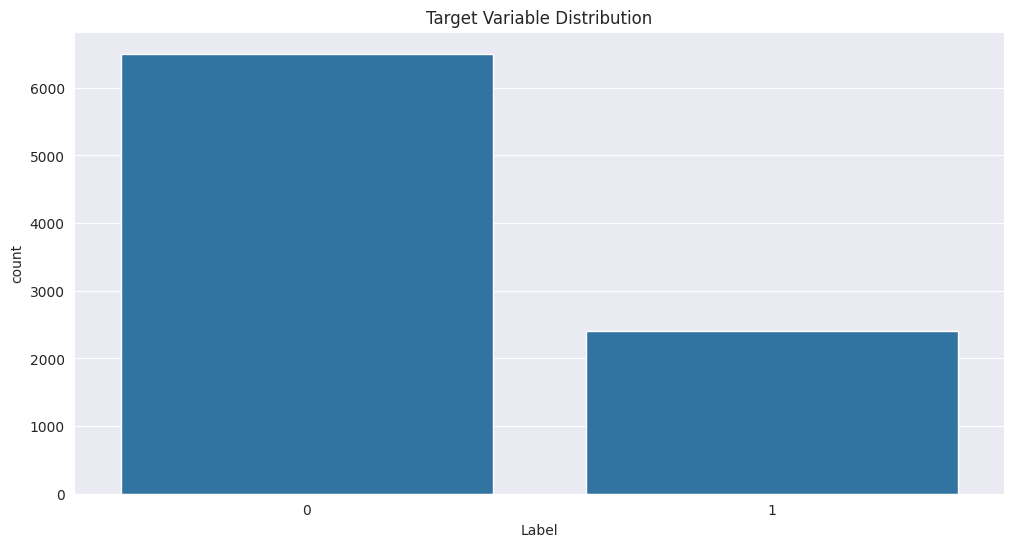

In [13]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

In [14]:
train['Label'].value_counts()

Label
0    6504
1    2404
Name: count, dtype: int64

There is a class imbalance in our dataset

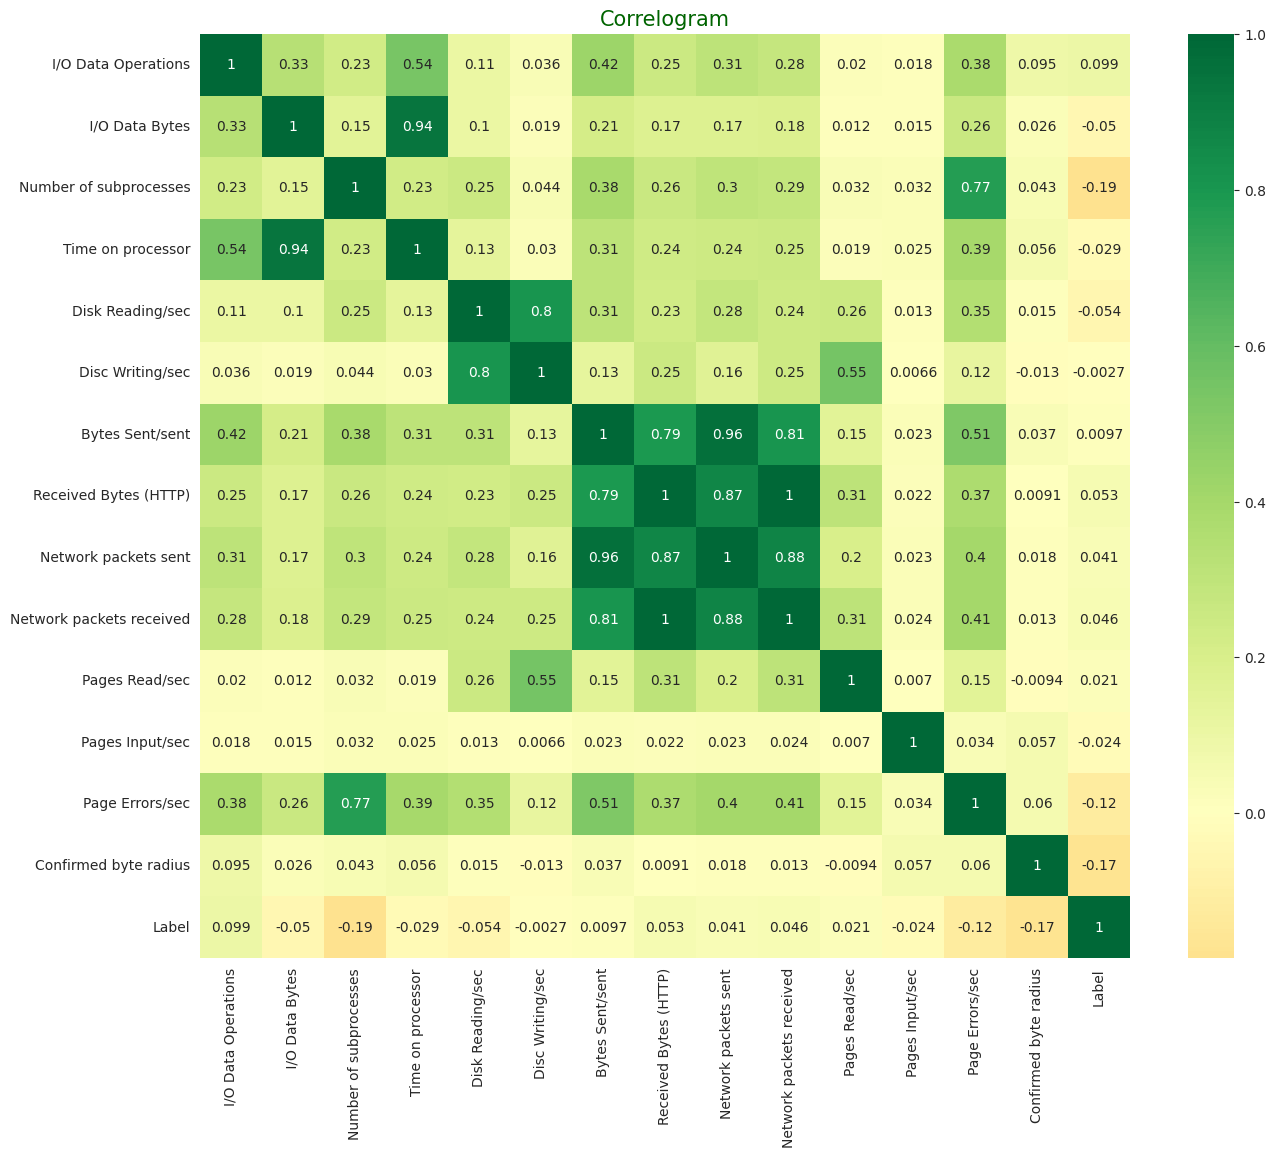

In [15]:
# Plotting a heatmap to show correlations between variables
corr = train.drop("ID",axis=1).corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target


# 6. Features Engineering

In [16]:
var_def

Feature  \
0        I/O Data Operations   
1             I/O Data Bytes   
2     Number of subprocesses   
3          Time on processor   
4           Disk Reading/sec   
5           Disc Writing/sec   
6      Confirmed byte radius   
7             Pages Read/sec   
8            Pages Input/sec   
9            Page Errors/sec   
10                Bytes Sent   
11     Received Bytes (HTTP)   
12      Network packets sent   
13  Network packets received   

                                          Description  
0   Speed at which the process is issuing read and...  
1   Speed at which the process is reading and writ...  
2   Number of sub-processes that are currently act...  
3   The total time, in seconds, that a process has...  
4                    Speed of disk reading operations  
5                 Speed of writing operations to disk  
6   The ratio of Memory/Bytes committed and Memory...  
7   Speed rate at which the disk was read in order...  
8   Speed at which pages are written to disk to fr...  
9   This is the average number of pages with fault...  
10  The rate at which bytes leave the browser’s HT...  
11  Speed of bytes arriving to the browser’s HTTP ...  
12       Speed of sending packets in the TCP protocol  
13       Packet reception speed over the TCP protocol

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [52]:
X = train.drop(columns=['ID','Label'])
y = train['Label']

In [53]:
list(X.columns)

['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

In [54]:
['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

# Création de nouvelles features basées sur les suggestions

# Creation of pertinent new features
for df in [X, test]:
    df['IO_Ratio'] = df[' I/O Data Bytes'] / (df['I/O Data Operations'] + 1e-5)
    df['Disk_IO_Ratio'] = df['Disk Reading/sec'] / (df['Disc Writing/sec'] + 1e-5)
    df['Network_Packet_Ratio'] = df['Network packets sent'] / (df['Network packets received'] + 1e-5)
    df['HTTP_Byte_Ratio'] = df['Bytes Sent/sent'] / (df['Received Bytes (HTTP)'] + 1e-5)

    # Aspects temporels
    df['Processor Utilization Rate'] = df['Time on processor'] / (df['I/O Data Operations'] + 1e-9)

# Affichage des nouvelles features
print("Nouvelles features ajoutées :")
print(df.columns)

Nouvelles features ajoutées :
Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius',
       'IO_Ratio', 'Disk_IO_Ratio', 'Network_Packet_Ratio', 'HTTP_Byte_Ratio',
       'Processor Utilization Rate'],
      dtype='object')


In [55]:
len(X.columns)

19

<a name="Preprocess"></a>
## 7. Modeling

In [56]:
# split train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

In [57]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6235, 19), (2673, 19), (6235,), (2673,))

In [58]:
X_train.head(3)

I/O Data Operations   I/O Data Bytes  Number of subprocesses  \
7549             5.110769      1126.991241                    27.0   
3563            22.197384      5203.875583                    27.0   
308              0.000000         0.000000                    26.0   

      Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent/sent  \
7549           0.034720          0.622181               0.0        44.974768   
3563           0.069435          0.777686               0.0        41.750635   
308            0.000000          0.377655               0.0        14.373086   

      Received Bytes (HTTP)  Network packets sent  Network packets received  \
7549              49.663343              0.422194                  0.288870   
3563             163.736258              0.622149                  0.688808   
308               16.972238              0.266580                  0.244365   

      Pages Read/sec  Pages Input/sec  Page Errors/sec  Confirmed byte radius  \
7549         0.00000              0.0       393.551439              23.492185   
3563         0.02222              0.0       945.599667              24.547401   
308          0.00000              0.0       240.099407              28.014527   

        IO_Ratio  Disk_IO_Ratio  Network_Packet_Ratio  HTTP_Byte_Ratio  \
7549  220.512612     62218.0582              1.461488         0.905593   
3563  234.436331     77768.6123              0.903213         0.254987   
308     0.000000     37765.4508              1.090864         0.846858   

      Processor Utilization Rate  
7549                    0.006793  
3563                    0.003128  
308                     0.000000

In [59]:
X_train.describe()

I/O Data Operations   I/O Data Bytes  Number of subprocesses  \
count          6235.000000     6.235000e+03             6235.000000   
mean             36.379396     1.130397e+05               29.852099   
std              74.456531     4.900791e+05                5.758417   
min               0.000000     0.000000e+00                1.000000   
25%               1.455737     8.274879e+02               27.000000   
50%              11.581501     5.008708e+03               28.000000   
75%              34.283991     3.927281e+04               30.000000   
max            1469.029821     4.677280e+06               51.000000   

       Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent/sent  \
count        6235.000000       6235.000000       6235.000000      6235.000000   
mean            0.497125          5.543060          1.230418       565.680099   
std             1.602049         22.508839         18.352905      2065.644196   
min             0.000000          0.044459          0.000000         1.197890   
25%             0.000000          0.756205          0.000000        33.830618   
50%             0.034734          1.710957          0.000000        66.993251   
75%             0.451321          5.865801          0.022230       225.975740   
max            18.086928       1064.819285        831.503948     98097.784300   

       Received Bytes (HTTP)  Network packets sent  Network packets received  \
count           6.235000e+03           6235.000000               6235.000000   
mean            1.697850e+04              4.865587                 12.913139   
std             9.440109e+04             22.409037                 63.856436   
min             1.554938e+00              0.022183                  0.022183   
25%             2.819804e+01              0.400013                  0.333325   
50%             8.819855e+01              0.710879                  0.644224   
75%             5.646562e+02              1.555859                  1.732805   
max             4.812144e+06           1118.878021               3183.701036   

       Pages Read/sec  Pages Input/sec  Page Errors/sec  \
count     6235.000000      6235.000000      6235.000000   
mean         1.156159         0.004511      2793.754839   
std         14.173774         0.083321      5063.277868   
min          0.000000         0.000000        16.143987   
25%          0.000000         0.000000       352.463370   
50%          0.022222         0.000000       684.091844   
75%          0.088882         0.000000      1378.651935   
max        475.031124         2.955622     98031.408630   

       Confirmed byte radius       IO_Ratio  Disk_IO_Ratio  \
count            6235.000000    6235.000000   6.235000e+03   
mean               28.358125    2962.541694   1.307886e+05   
std                 3.967227   16168.066326   1.853499e+05   
min                19.102023       0.000000   3.160996e-02   
25%                25.115178     216.821565   1.309411e+02   
50%                28.493428     357.745111   6.887975e+04   
75%                30.898101    1066.671876   1.599447e+05   
max                46.784800  264552.964461   1.524931e+06   

       Network_Packet_Ratio  HTTP_Byte_Ratio  Processor Utilization Rate  
count           6235.000000      6235.000000                6.235000e+03  
mean               1.059034         0.873263                5.011710e+04  
std                0.508048         0.881248                1.584647e+06  
min                0.069376         0.002652                0.000000e+00  
25%                0.884159         0.387190                0.000000e+00  
50%                1.055529         0.749822                4.200272e-03  
75%                1.238069         1.098557                1.106262e-02  
max               10.995061        16.128468                6.943779e+07

In [60]:
X_train

I/O Data Operations   I/O Data Bytes  Number of subprocesses  \
7549             5.110769      1126.991241                    27.0   
3563            22.197384      5203.875583                    27.0   
308              0.000000         0.000000                    26.0   
2407            47.827710     73713.107310                    47.0   
252              7.388823      1778.347376                    27.0   
...                   ...              ...                     ...   
2611            23.016330      5367.581514                    25.0   
664              4.866693      5164.072457                    29.0   
2272             0.044444        16.533300                    27.0   
409              5.087153      1835.107248                    26.0   
5233          1024.316376    316393.974100                    48.0   

      Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent/sent  \
7549           0.034720          0.622181          0.000000        44.974768   
3563           0.069435          0.777686          0.000000        41.750635   
308            0.000000          0.377655          0.000000        14.373086   
2407           0.417567         10.624772          0.489006      4919.580688   
252            0.034774          1.201797          0.000000        26.061182   
...                 ...               ...               ...              ...   
2611           0.069427          0.933094          0.000000        52.053342   
664            0.000000          8.044488          0.000000        27.000146   
2272           0.000000          2.333329          0.000000        56.377666   
409            0.000000          0.866371          0.000000         9.196862   
5233           5.521219         27.779729          6.956044     11251.390120   

      Received Bytes (HTTP)  Network packets sent  Network packets received  \
7549              49.663343              0.422194                  0.288870   
3563             163.736258              0.622149                  0.688808   
308               16.972238              0.266580                  0.244365   
2407          289547.824200             60.103314                198.758813   
252               15.645611              0.178044                  0.066766   
...                     ...                   ...                       ...   
2611              23.282929              0.399898                  0.177732   
664               32.489065              0.488892                  0.488892   
2272             136.244174              0.533332                  0.466666   
409                8.463779              0.133288                  0.088859   
5233           59354.968170             51.670295                 74.894148   

      Pages Read/sec  Pages Input/sec  Page Errors/sec  Confirmed byte radius  \
7549        0.000000              0.0       393.551439              23.492185   
3563        0.022220              0.0       945.599667              24.547401   
308         0.000000              0.0       240.099407              28.014527   
2407        1.644839              0.0     11704.120070              21.033341   
252         0.000000              0.0       448.670727              32.771082   
...              ...              ...              ...                    ...   
2611        0.000000              0.0       776.667848              32.279107   
664         0.066667              0.0      1384.051952              30.347418   
2272        0.000000              0.0       380.777021              34.080761   
409         0.000000              0.0       337.640362              22.315429   
5233        1.311203              0.0     36580.746640              29.075723   

         IO_Ratio  Disk_IO_Ratio  Network_Packet_Ratio  HTTP_Byte_Ratio  \
7549   220.512612   62218.058200              1.461488         0.905593   
3563   234.436331   77768.612300              0.903213         0.254987   
308      0.000000   37765.450800              1.090864   

**START**

In [31]:
from sklearn.metrics import f1_score
import numpy as np

# Fonction pour calculer le F1-score pendant l'entraînement
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # Seuil à 0.5
    f1 = f1_score(y_true, y_pred_binary)
    return "f1", f1

In [ ]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_val, label=y_val)

# # Here we set eval_metric to be 'auc' as well as other hypter parameters of xgboost
# param0 = [
#     ('max_depth', 5),
#     ('learning_rate', 0.05),
#     ('objective', 'binary:logistic'),
#     ('booster', 'gbtree'),
#     ('n_jobs', -1),
#     ('min_child_weight', 0.7),
#     ('disable_default_eval_metric', 1),
#     ('scale_pos_weight', (sum(y_train==0)/sum(y_train==1))),
#     ('random_state', SEED),
#     ('reg_lambda', 0.5)
# ]

# watchlist = [(dtrain, "trn"), (dtest, "tst")]
# n_estimators = 1500

# # This is the same as fitting
# model = xgb.train(param0, dtrain, n_estimators , evals=watchlist, feval=f1_eval,)

In [111]:
# Calcul des poids des classes
class_counts = np.bincount(y_train)  # Compte les occurrences de chaque classe
total_samples = len(y_train)

# Calcul des poids : inverse de la fréquence
class_weights = total_samples / class_counts

class_weights[0] = class_weights[0]
class_weights[1] = 1.25 * class_weights[1]

class_weights


array([1.36972759, 5.557041  ])

In [113]:
# modèle CatBoostClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=15000,
    learning_rate=0.008,
    depth=6,
    loss_function='Logloss',  # Fonction de perte pour la classification binaire
    verbose=1000,
    eval_metric='F1',  # Optimiser pour le F1-score
    class_weights=class_weights,  # Utiliser les poids de classe
    early_stopping_rounds=4000,
    random_state=SEED
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8734169	test: 0.8721107	best: 0.8721107 (0)	total: 13.7ms	remaining: 3m 25s
1000:	learn: 0.9737619	test: 0.9577017	best: 0.9577690 (967)	total: 9.37s	remaining: 2m 11s
2000:	learn: 0.9935170	test: 0.9703727	best: 0.9703727 (1923)	total: 17.4s	remaining: 1m 53s
3000:	learn: 0.9977351	test: 0.9716298	best: 0.9730738 (2882)	total: 27.7s	remaining: 1m 50s
4000:	learn: 0.9992683	test: 0.9715803	best: 0.9730738 (2882)	total: 39.3s	remaining: 1m 47s
5000:	learn: 0.9997804	test: 0.9715306	best: 0.9733637 (4636)	total: 51.8s	remaining: 1m 43s
6000:	learn: 1.0000000	test: 0.9729310	best: 0.9736546 (5626)	total: 1m 4s	remaining: 1m 36s
7000:	learn: 1.0000000	test: 0.9723755	best: 0.9736546 (5626)	total: 1m 18s	remaining: 1m 29s
8000:	learn: 1.0000000	test: 0.9723755	best: 0.9736546 (5626)	total: 1m 33s	remaining: 1m 21s
9000:	learn: 1.0000000	test: 0.9723755	best: 0.9736546 (5626)	total: 1m 49s	remaining: 1m 13s
Stopped by overfitting detector  (4000 iterations wait)

bestTest = 0.973

# Testons LightGM voir

In [122]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Définition du modèle LightGBM
model = lgb.LGBMClassifier(
    n_estimators=15000,         # Nombre d'estimations (arbres)
    learning_rate=0.008,        # Taux d'apprentissage
    max_depth=6,                # Profondeur des arbres
    objective='binary',         # Classification binaire
    metric='f1',                # Optimiser pour le F1-score
    class_weight={0: class_weights[0], 1 : class_weights[1]},  # Poids de classe pour équilibrer les classes
    # early_stopping_rounds=5000,  # Arrêt précoce après 5000 itérations sans amélioration
    random_state=SEED           # Pour la reproductibilité
)

# Fit model
model.fit(X_train, y_train)


# Prédictions sur l'ensemble de validation
preds = model.predict(X_val)

# Évaluation des performances du modèle
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Faisons du stack

In [125]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score


# Définition des modèles de base
estimators = [
      ('lgbm', lgb.LGBMClassifier(
            n_estimators=15000,         # Nombre d'estimations (arbres)
            learning_rate=0.008,        # Taux d'apprentissage
            max_depth=6,                # Profondeur des arbres
            objective='binary',         # Classification binaire
            metric='f1',                # Optimiser pour le F1-score
            class_weight={0: class_weights[0], 1 : class_weights[1]},  # Poids de classe pour équilibrer les classes
            # early_stopping_rounds=5000,  # Arrêt précoce après 5000 itérations sans amélioration
            random_state=SEED           # Pour la reproductibilité
    )),
    ('cat', CatBoostClassifier(
            iterations=10000,
            learning_rate=0.008,
            depth=6,
            loss_function='Logloss',  # Fonction de perte pour la classification binaire
            verbose=200,
            eval_metric='F1',  # Optimiser pour le F1-score
            class_weights=0.4*class_weights,  # Utiliser les poids de classe
            early_stopping_rounds=3000,
            random_state=SEED
    )),
]



# StackingClassifier
model_stack = StackingClassifier(
    estimators=estimators,      # Modèles de base
    final_estimator=None,       # Par défaut : régression logistique pour le méta-modèle
    cv=5,                       # Validation croisée à 5 plis
    n_jobs=-1,                  # Utilisation de tous les cœurs
    verbose=1                   # Affichage des logs
)

# Entraîner le modèle
model_stack.fit(X_train, y_train)

# make predictions on validation set
preds = model_stack.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1952
           1       0.97      0.96      0.96       721

    accuracy                           0.98      2673
   macro avg       0.98      0.97      0.97      2673
weighted avg       0.98      0.98      0.98      2673

Accuracy:  0.9797979797979798
Confusion Matrix: 
 [[1928   24]
 [  30  691]]


In [129]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Prédictions de probabilités sur le jeu de validation
y_proba = model.predict_proba(X_val)[:, 1]  # Probabilités pour la classe 1

# Tester différents thresholds
for threshold in [0.35, 0.40, 0.5]:
    # Convertir les probabilités en prédictions
    y_pred = (y_proba > threshold).astype(int)

    # Calculer les métriques
    print(f"\nThreshold: {threshold}")
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))



Threshold: 0.35
Confusion Matrix:
 [[1930   22]
 [  27  694]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1952
           1       0.97      0.96      0.97       721

    accuracy                           0.98      2673
   macro avg       0.98      0.98      0.98      2673
weighted avg       0.98      0.98      0.98      2673

F1 Score: 0.9659011830201809

Threshold: 0.4
Confusion Matrix:
 [[1931   21]
 [  29  692]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1952
           1       0.97      0.96      0.97       721

    accuracy                           0.98      2673
   macro avg       0.98      0.97      0.98      2673
weighted avg       0.98      0.98      0.98      2673

F1 Score: 0.9651324965132496

Threshold: 0.5
Confusion Matrix:
 [[1934   18]
 [  32  689]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99   

In [ ]:
# bestTest = 0.9687929638
# bestIteration = 4651

# Shrink model to first 4652 iterations.
#               precision    recall  f1-score   support

#            0       0.98      0.98      0.98      1626
#            1       0.96      0.96      0.96       601

#     accuracy                           0.98      2227
#    macro avg       0.97      0.97      0.97      2227
# weighted avg       0.98      0.98      0.98      2227

# Accuracy:  0.9757521329142343
# Confusion Matrix:
#  [[1599   27]
#  [  27  574]]

**END**

In [26]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1626
           1       0.98      0.93      0.95       601

    accuracy                           0.97      2227
   macro avg       0.98      0.96      0.97      2227
weighted avg       0.97      0.97      0.97      2227



In [84]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1952
           1       0.97      0.96      0.96       721

    accuracy                           0.98      2673
   macro avg       0.98      0.97      0.97      2673
weighted avg       0.98      0.98      0.98      2673



In [130]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1952
           1       0.97      0.96      0.96       721

    accuracy                           0.98      2673
   macro avg       0.98      0.97      0.98      2673
weighted avg       0.98      0.98      0.98      2673



In [85]:
#make predictions on test set
test['Target'] = model.predict(test.drop("ID", axis=1))

In [86]:
sub = test[['ID', 'Target']]

In [87]:
sub.head()

ID  Target
0  ID_L7RNFK5JC9       0
1  ID_KUTY5K1G5F       0
2  ID_H6PJWKU831       1
3  ID_DNQXNVTXHE       1
4  ID_8CRTF1BJOD       0

In [88]:
sub.to_csv('sub_4.csv', index=False)

In [51]:
importance = model.get_feature_importance(prettified=True)
importance

Feature Id  Importances
0        I/O Data Operations    32.902247
1             I/O Data Bytes    13.752477
2                   IO_Ratio    10.325189
3           Disk Reading/sec     6.033181
4          Time on processor     5.499493
5     Number of subprocesses     5.461846
6      Confirmed byte radius     5.420621
7            Page Errors/sec     4.588565
8      Received Bytes (HTTP)     2.841847
9            Bytes Sent/sent     2.604969
10  Network packets received     2.540999
11           HTTP_Byte_Ratio     2.488875
12      Network packets sent     1.975984
13      Network_Packet_Ratio     1.415947
14            Pages Read/sec     0.763801
15             Disk_IO_Ratio     0.755444
16          Disc Writing/sec     0.627303
17           Pages Input/sec     0.001212

In [63]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1626
           1       0.96      0.96      0.96       601

    accuracy                           0.98      2227
   macro avg       0.97      0.97      0.97      2227
weighted avg       0.98      0.98      0.98      2227

Accuracy:  0.9784463403682083
Confusion Matrix: 
 [[1603   23]
 [  25  576]]


In [52]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1626
           1       0.98      0.93      0.96       601

    accuracy                           0.98      2227
   macro avg       0.98      0.96      0.97      2227
weighted avg       0.98      0.98      0.98      2227

Accuracy:  0.9770992366412213
Confusion Matrix: 
 [[1616   10]
 [  41  560]]


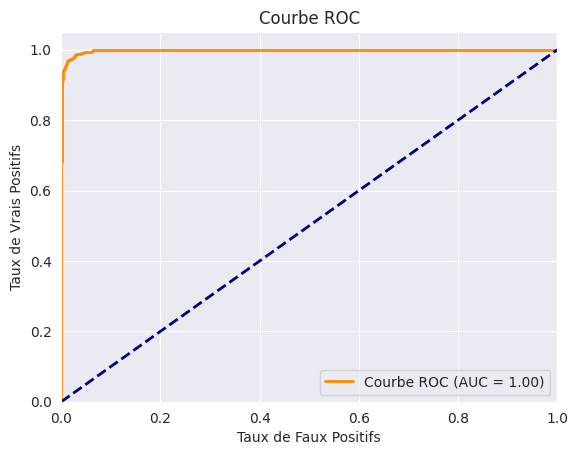

In [132]:
# Tentation de résolution des faux négatifs

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
import numpy as np

# Prédire les probabilités
y_probs = model.predict_proba(X_val)[:, 1]

# Courbe ROC
fpr, tpr, _ = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

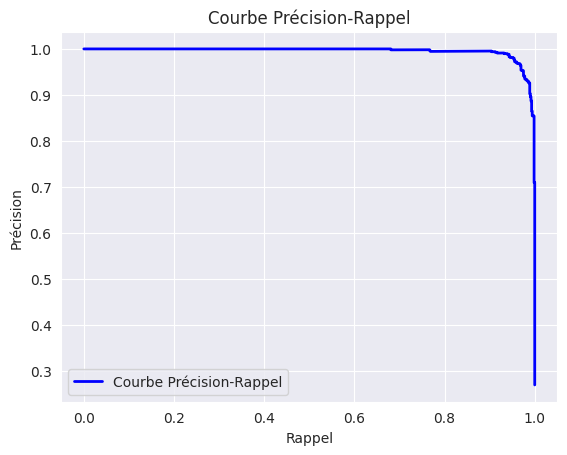

In [133]:
# Courbe Précision-Rappel
precision, recall, pr_thresholds = precision_recall_curve(y_val, y_probs)
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Courbe Précision-Rappel')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc="lower left")
plt.show()

In [134]:
# Calcul des F1-Score pour chaque seuil
f1_scores = [f1_score(y_val, (y_probs > threshold)) for threshold in pr_thresholds]
best_threshold = pr_thresholds[np.argmax(f1_scores)]
print("Seuil optimal pour maximiser le F1-Score : ", best_threshold)

Seuil optimal pour maximiser le F1-Score :  0.2268770419662854


# Modifions le threshold à 0.36

In [136]:
# Prédire les probabilités
y_probs = model.predict_proba(X_val)[:, 1]

# Seuil optimal
y_pred_optimal = (y_probs > best_threshold).astype(int)

# check performance of the model
print(classification_report(y_val, y_pred_optimal))

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred_optimal)
print("Matrice de confusion :\n", conf_matrix)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1952
           1       0.97      0.97      0.97       721

    accuracy                           0.98      2673
   macro avg       0.98      0.98      0.98      2673
weighted avg       0.98      0.98      0.98      2673

Matrice de confusion :
 [[1928   24]
 [  23  698]]


In [140]:
test = test.drop("Target", axis=1)

In [141]:
# submit
test_proba = model.predict_proba(test.drop("ID", axis=1))[:, 1]

# Convertir les probabilités en prédictions binaires
test['Target'] = (test_proba > best_threshold).astype(int)


sub = test[['ID', 'Target']]

sub.head()

sub.to_csv('sub_5.csv', index=False)

# Test de l'usage de plusieurs modèles à la fois

In [53]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score


# Définition des modèles de base
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=300,  # Nombre d'arbres
        max_depth=7,       # Profondeur maximale
        n_jobs=-1,         # Utilisation de tous les cœurs disponibles
        random_state=0
    )),
    ('cat', CatBoostClassifier(
        iterations=1500,       # Nombre d'itérations
        learning_rate=0.03,    # Taux d'apprentissage
        depth=6,               # Profondeur des arbres
        random_seed=0,
        verbose=0              # Désactiver les logs
    )),
]

# StackingClassifier
model_2 = StackingClassifier(
    estimators=estimators,      # Modèles de base
    final_estimator=None,       # Par défaut : régression logistique pour le méta-modèle
    cv=5,                       # Validation croisée à 5 plis
    n_jobs=-1,                  # Utilisation de tous les cœurs
    verbose=1                   # Affichage des logs
)

# Entraîner le modèle
model_2.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=0)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7de51df1a0e0>)],
                   n_jobs=-1, verbose=1)

In [54]:
# Prédictions et évaluation
y_pred = model_2.predict(X_val)
f1 = f1_score(y_val, y_pred)
print(f"F1 Score: {f1:.4f}")

print("Accuracy: ", accuracy_score(y_val, y_pred))

print("Confusion Matrix: \n", confusion_matrix(y_val, y_pred))

F1 Score: 0.9646
Accuracy:  0.9811405478221823
Confusion Matrix: 
 [[1612   14]
 [  28  573]]
